In [44]:
import healpy as hp

import numpy as np

import matplotlib.pyplot as plt

from lenscarf.utils_hp import almxfl, Alm, alm_copy

from plancklens.utils import alm_copy as palm_copy

from pathlib import Path

from lenscarf.iterators import statics


In [27]:
inputphi = hp.read_alm("/Users/omard/Downloads/SCRATCHFOLDER/n32/S4WebskyWebskyBornGauss/cmbs/plm_in_0_lmax5120.fits")

In [73]:
unnormname = "phi_plm_it000.npy"

In [74]:
hp.Alm.getlmax(inputphi.size)

4500

In [75]:
hp.Alm.getlmax(plm.size)

4500

In [97]:
### Standard Case
direc = Path("/Users/omard/Downloads/SCRATCHFOLDER/n32/S4WebskyWebskyBornGauss/lenscarfrecs/ptt_sim0000")

plm = np.load(direc / unnormname)

inputphi = palm_copy(inputphi, hp.Alm.getlmax(plm.size))

iters = [0, 1, 2, 3, 4, 5, 6, 7, 9]

plms = statics.rec.load_plms(direc, iters)

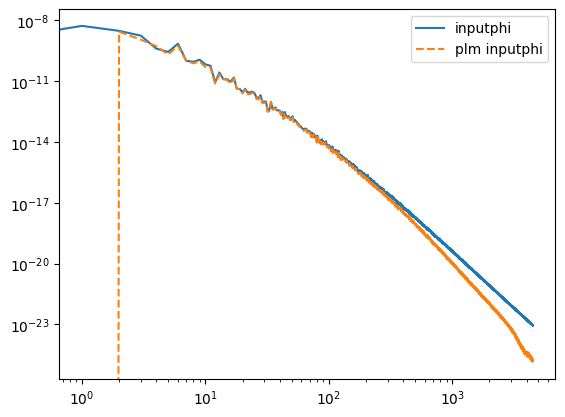

In [98]:
plt.loglog(hp.alm2cl(inputphi), label="inputphi")
plt.loglog(hp.alm2cl(plm, inputphi), label="plm inputphi", ls = "--")
plt.legend()

In [99]:
### Fix Inverse Variance leg

direc = Path("/Users/omard/Downloads/SCRATCHFOLDER/n32/S4WebskyWebskyBornGauss/lenscarfrecs/ptt_sim0000fixinvvar")

plmfixinvvar = np.load(direc / unnormname)

plmsfixinvar = statics.rec.load_plms(direc, iters)

In [100]:
inin = hp.alm2cl(inputphi)

In [105]:
itplot = [1, 4, 6, 8]

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_46259/2363138166.py:1: RuntimeWarning: invalid value encountered in divide
  plt.loglog(hp.alm2cl(plm, inputphi)/inin, label="plm inputphi", ls = "--")
/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_46259/2363138166.py:4: RuntimeWarning: invalid value encountered in divide
  plt.loglog(hp.alm2cl(plmsfixinvar[it], inputphi)/inin, label=f"plmfixinvvar it{it} inputphi", ls = "--")
/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_46259/2363138166.py:5: RuntimeWarning: invalid value encountered in divide
  plt.loglog(hp.alm2cl(plms[it], inputphi)/inin, label=f"plm it{it} inputphi", ls = "--")


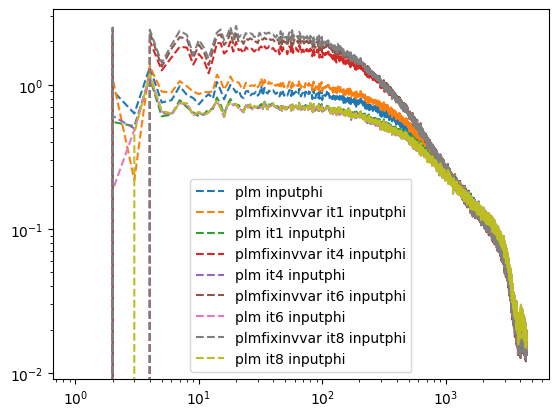

In [106]:
plt.loglog(hp.alm2cl(plm, inputphi)/inin, label="plm inputphi", ls = "--")

for it in itplot:
    plt.loglog(hp.alm2cl(plmsfixinvar[it], inputphi)/inin, label=f"plmfixinvvar it{it} inputphi", ls = "--")
    plt.loglog(hp.alm2cl(plms[it], inputphi)/inin, label=f"plm it{it} inputphi", ls = "--")


plt.legend()

In [107]:
def get_rho_of_a_wrt_b(a, b):
    return hp.alm2cl(a, b)/np.sqrt(hp.alm2cl(a, a)*hp.alm2cl(b, b))

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_46259/883259351.py:2: RuntimeWarning: invalid value encountered in divide
  return hp.alm2cl(a, b)/np.sqrt(hp.alm2cl(a, a)*hp.alm2cl(b, b))


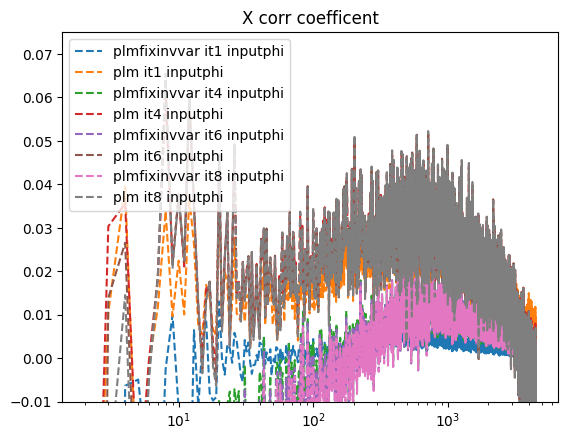

In [108]:
plt.title("X corr coefficent")
rho0 = get_rho_of_a_wrt_b(plm, inputphi)
for it in itplot:
    plt.plot(get_rho_of_a_wrt_b(plmsfixinvar[it], inputphi)-rho0, label= f"plmfixinvvar it{it} inputphi", ls = "--")
    plt.plot(get_rho_of_a_wrt_b(plms[it], inputphi)-rho0, label= f"plm it{it} inputphi", ls = "--")
plt.ylim(-0.01, 0.075)
plt.xscale("log")
plt.legend()